In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

In [2]:
symbol = 'AAPL'
df = web.DataReader(symbol, 'yahoo', '2019-01-01', '2019-04-01')

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1546290000&period2=1554152399&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [3]:
df = pd.read_csv("AAPL.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,39.632500,39.840000,39.119999,39.435001,38.338478,140014000
1,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.382229,148158800
2,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.559078,365248800
3,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.034370,234428400
4,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.954170,219111200


In [5]:
series = df['Close']
series.index = np.arange(series.shape[0])
print(series)

0     39.435001
1     39.480000
2     35.547501
3     37.064999
4     36.982498
        ...    
58    46.697498
59    47.117500
60    47.180000
61    47.487499
62    47.810001
Name: Close, Length: 63, dtype: float64


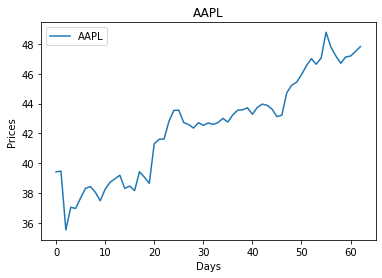

In [6]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.legend()
plt.show()

In [7]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import pandas_datareader as web
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

df = pd.read_csv("AAPL.csv")
series = df['Close']
series.index = np.arange(series.shape[0])

In [8]:
month_diff = series.shape[0] // 30 # Integer divide the number of prices we have by 30
if month_diff == 0: # We want a value greater than 0
    month_diff = 1
smooth = int(2 * month_diff + 3) # Simple algo to determine smoothness
pts = savgol_filter(series, smooth, 3) # Get the smoothened price data

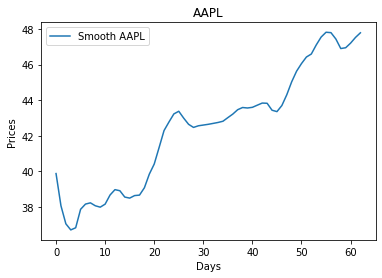

In [9]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()
plt.show()

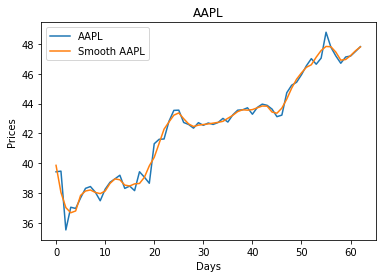

In [10]:
plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Prices')
plt.plot(series, label=symbol)
plt.plot(pts, label=f'Smooth {symbol}')
plt.legend()
plt.show()

In [11]:
def pythag(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)

def local_min_max(pts):
    local_min = []
    local_max = []
    prev_pts = [(0, pts[0]), (1, pts[1])]
    for i in range(1, len(pts) - 1):
        append_to = ''
        if pts[i-1] > pts[i] < pts[i+1]:
            append_to = 'min'
        elif pts[i-1] < pts[i] > pts[i+1]:
            append_to = 'max'
        if append_to:
            if local_min or local_max:
                prev_distance = pythag(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythag(prev_pts[1], (i, pts[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, pts[i])
                if append_to == 'min':
                    local_min.append((i, pts[i]))
                else:
                    local_max.append((i, pts[i]))
    return local_min, local_max